In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn as sk
from sklearn import neural_network
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from scipy.stats import gaussian_kde

In [70]:
df = pd.read_csv('./data/data/games_formated_07_20.csv')
#df[df['G_home']<11]['G_home']

The input features we want to include are:
- 'W_PCT_home',
- 'HOME_RECORD_home',
- 'W_PCT_away',
- 'ROAD_RECORD_away',
- 'WIN_PRCT_home_3g',
- 'PTS_home_3g',
- 'FG_PCT_home_3g',
- 'FT_PCT_home_3g',
- 'FG3_PCT_home_3g',
- 'AST_home_3g',
- 'REB_home_3g',
    
The second set would include the above statistics for past 10 games instead
    

In [71]:
cols = list(df)
cols

['GAME_ID',
 'G_home',
 'W_PCT_home',
 'HOME_RECORD_home',
 'ROAD_RECORD_home',
 'W_PCT_prev_home',
 'HOME_RECORD_prev_home',
 'ROAD_RECORD_prev_home',
 'G_away',
 'W_PCT_away',
 'HOME_RECORD_away',
 'ROAD_RECORD_away',
 'W_PCT_prev_away',
 'HOME_RECORD_prev_away',
 'ROAD_RECORD_prev_away',
 'WIN_PRCT_home_3g',
 'PTS_home_3g',
 'FG_PCT_home_3g',
 'FT_PCT_home_3g',
 'FG3_PCT_home_3g',
 'AST_home_3g',
 'REB_home_3g',
 'WIN_PRCT_away_3g',
 'PTS_away_3g',
 'FG_PCT_away_3g',
 'FT_PCT_away_3g',
 'FG3_PCT_away_3g',
 'AST_away_3g',
 'REB_away_3g',
 'WIN_PRCT_home_10g',
 'PTS_home_10g',
 'FG_PCT_home_10g',
 'FT_PCT_home_10g',
 'FG3_PCT_home_10g',
 'AST_home_10g',
 'REB_home_10g',
 'WIN_PRCT_away_10g',
 'PTS_away_10g',
 'FG_PCT_away_10g',
 'FT_PCT_away_10g',
 'FG3_PCT_away_10g',
 'AST_away_10g',
 'REB_away_10g',
 'SEASON',
 'HOME_TEAM_WINS']

In [72]:
refined_df3 = df[['W_PCT_home',
 'HOME_RECORD_home',
 'ROAD_RECORD_away',                 
 'WIN_PRCT_home_3g',
 'PTS_home_3g',
 'FG_PCT_home_3g',
 'FT_PCT_home_3g',
 'FG3_PCT_home_3g',
 'AST_home_3g',
 'REB_home_3g',
 'HOME_TEAM_WINS']]

In [73]:
refined_df3

,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_away,WIN_PRCT_home_3g,PTS_home_3g,FG_PCT_home_3g,FT_PCT_home_3g,FG3_PCT_home_3g,AST_home_3g,REB_home_3g,HOME_TEAM_WINS
0,0.293,0.292683,0.414634,0.333333,88.666667,0.440667,0.778333,0.290667,18.000000,38.666667,1
1,0.488,0.609756,0.292683,0.000000,86.666667,0.449333,0.612667,0.333333,18.000000,40.666667,0
2,0.646,0.634146,0.414634,0.000000,92.000000,0.399000,0.808333,0.225333,16.666667,39.333333,1
3,0.610,0.731707,0.365854,0.000000,82.000000,0.385000,0.692000,0.281333,19.000000,44.000000,0
4,0.341,0.439024,0.439024,0.333333,96.666667,0.461333,0.686333,0.424000,23.333333,35.666667,1
...,...,...,...,...,...,...,...,...,...,...,...
17917,0.603,0.805556,0.750000,0.333333,112.333333,0.499000,0.848000,0.400667,27.333333,37.666667,1
17918,0.603,0.805556,0.750000,0.333333,109.000000,0.482333,0.870333,0.358000,25.666667,36.666667,0
17919,0.732,0.714286,0.405405,0.666667,110.000000,0.459333,0.734667,0.344000,26.666667,43.000000,0
17920,0.603,0.805556,0.750000,0.666667,107.333333,0.466000,0.892000,0.373667,23.000000,37.000000,0


In [74]:
(X3_train, X3_test, y3_train, y3_test) = train_test_split(refined_df3.loc[:, ~refined_df3.columns.isin(['HOME_TEAM_WINS'])], refined_df3.loc[:, refined_df3.columns.isin(['HOME_TEAM_WINS'])], test_size=.2)

***
# Multi-Layer Perceptron Regression (3 Games)

In [75]:
g3_regress = neural_network.MLPRegressor()
g3_regress.fit(X3_train, np.ravel(y3_train))
g3_predicted = g3_regress.predict(X3_test)

In [76]:
flaty3_test = y3_test.values.flatten()

In [77]:
g3_loss = (np.dot(np.subtract(g3_predicted, flaty3_test), np.subtract(g3_predicted, flaty3_test)))/len(g3_predicted)

In [78]:
1 - g3_loss

0.775881154707639

The multi-layer perceptron regressions we use in this project will use relU for activation and adam for optimization. 

***

# Multi-Layer Perceptron Classifier (3 Games)

In [79]:
g3_class = neural_network.MLPClassifier()
g3_class.fit(X3_train, np.ravel(y3_train))
g3_class_predicted = g3_class.predict(X3_test)

In [80]:
g3_class_loss = (np.dot(np.subtract(g3_class_predicted, flaty3_test), np.subtract(g3_class_predicted, flaty3_test)))/len(g3_class_predicted)

In [81]:
1 - g3_class_loss

0.6518828451882845

In [82]:
flaty3_train = y3_train.values.flatten()

In [83]:
g3_class_predict_train = g3_class.predict(X3_train)

In [84]:
sk.metrics.accuracy_score(g3_class_predict_train, flaty3_train)

0.6504847597126316

***
# Multi-Layer Perceptron Regression (10 games)

In [85]:
refined_df10 = df[['W_PCT_home',
 'HOME_RECORD_home',
 'ROAD_RECORD_away',                 
 'WIN_PRCT_home_10g',
 'PTS_home_10g',
 'FG_PCT_home_10g',
 'FT_PCT_home_10g',
 'FG3_PCT_home_10g',
 'AST_home_10g',
 'REB_home_10g',
 'HOME_TEAM_WINS']]

In [86]:
(X10_train, X10_test, y10_train, y10_test) = train_test_split(refined_df10.loc[:, ~refined_df10.columns.isin(['HOME_TEAM_WINS'])], refined_df10.loc[:, refined_df10.columns.isin(['HOME_TEAM_WINS'])], test_size=.2)

In [87]:
%%capture --no-display
g10_regress = neural_network.MLPRegressor()
# dont use ravel() here or it messes up the loss curve graphed below.
g10_regress.fit(X10_train, y10_train)
g10_predicted = g10_regress.predict(X10_test)

In [88]:
# redundant flattening instead of ravel, but the variable names are here to stay 
flaty10_test = y10_test.values.flatten()
flaty10_train = np.ravel(y10_train)

In [89]:
g10_loss = (np.dot(np.subtract(g10_predicted, flaty10_test), np.subtract(g10_predicted, flaty10_test)))/len(g10_predicted)

In [90]:
1 - g10_loss

0.7836674410744935

In [91]:
sk.metrics.explained_variance_score(g10_predicted, flaty10_test)

-7.449120036602965

***
# Multi-Layer Perceptron Classifier (10 Games)

In [92]:
%%capture --no-display
g10_class = neural_network.MLPClassifier()
g10_class.fit(X10_train, np.ravel(y10_train))
g10_class_predicted = g10_class.predict(X10_test)

In [93]:
g10_class_loss = (np.dot(np.subtract(g10_class_predicted, flaty10_test), np.subtract(g10_class_predicted, flaty10_test)))/len(g10_class_predicted)

In [94]:
1 - g10_class_loss

0.6415620641562064

In [95]:
flaty10_train = y10_train.values.flatten()

In [96]:
g10_class_predict_train = g10_class.predict(X10_train)

In [97]:
sk.metrics.accuracy_score(g10_class_predict_train, flaty10_train)

0.646020785380484

## Plotting the Regression

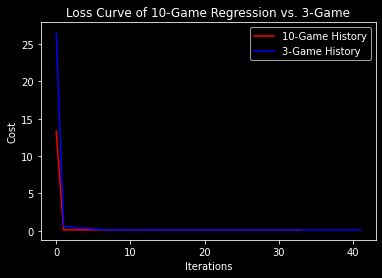

In [98]:
plt.style.use('dark_background')
g10_line, = plt.plot(g10_regress.loss_curve_, color='r')
g3_line, = plt.plot(g3_regress.loss_curve_, color='b')
plt.title("Loss Curve of 10-Game Regression vs. 3-Game")
plt.xlabel('Iterations')
plt.ylabel('Cost')
g10_line.set_label("10-Game History")
g3_line.set_label("3-Game History")
plt.legend()
plt.show()


In [99]:
plt.figure(30)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

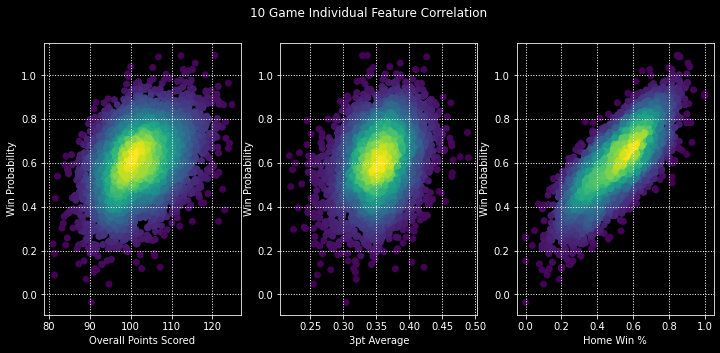

In [100]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

# home points
# This prepend blurb allows coloration by density 
hpts = np.vstack([X10_test['PTS_home_10g'], g10_predicted])
hpts_z = gaussian_kde(hpts)(hpts)
# scatterplot 1
ax1.scatter(X10_test['PTS_home_10g'], g10_predicted, c=hpts_z)
ax1.grid(linestyle='dotted', linewidth=1.0)
ax1.set_xlabel("Overall Points Scored")
ax1.set_ylabel("Win Probability")

# 3-point percentage
pts3 = np.vstack([X10_test['FG3_PCT_home_10g'], g10_predicted])
pts3_z = gaussian_kde(pts3)(pts3)
# scatterplot 2
ax2.scatter(X10_test['FG3_PCT_home_10g'], g10_predicted, c=pts3_z)
ax2.grid(linestyle='dotted', linewidth=1.0)
ax2.set_xlabel("3pt Average")
ax2.set_ylabel("Win Probability")

# win percentage
wpct = np.vstack([X10_test['W_PCT_home'], g10_predicted])
wpct_z = gaussian_kde(wpct)(wpct)
# scatterplot 3
ax3.scatter(X10_test['W_PCT_home'], g10_predicted, c=wpct_z)
ax3.grid(linestyle='dotted', linewidth=1.0)
ax3.set_xlabel("Home Win %")
ax3.set_ylabel("Win Probability")

fig.suptitle("10 Game Individual Feature Correlation")
plt.show(30)

A quick example of correlation shows why predicting basketball games is so complex: each feature plays a different role in the final prediction of the game. As we learned when discussing Perceptron models, this is represented by the weights of each of the features that are learned. The above set of graphs displays the 

***
# Confusion Matrices

In [101]:
cm3 = confusion_matrix(flaty3_test, g3_class_predicted, normalize="true")
cm10 = confusion_matrix(flaty10_test, g10_class_predicted, normalize="true")

Text(0.5, 1.0, '10 Game History')

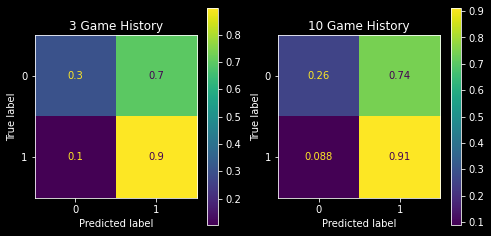

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

cm3_disp = ConfusionMatrixDisplay(cm3).plot(ax=ax1)
ax1.set_title("3 Game History")
cm10_disp = ConfusionMatrixDisplay(cm10).plot(ax=ax2)
ax2.set_title("10 Game History")

We had a significant difference in our 3-game versus 10-game classifier confusion matrices. Note that a label of "1" means the home team won, and a label of "0" means that the home team lost. 

We had far more false positives in the 3-game history then the 10-game, indicating we were more likely to be optimistic given less games to work from. When it was a home team win, however, the model was quite accurate at identifying. This might require further tuning to push the model toward tightening its classification boundaries/weights.  

### OUTDATED ANALYSIS
In the 10-game case, the model found an easier time identifying the negative: when the home team lost, it identified as such with 73% accuracy. However, when the home team won, this model had a much tougher time extrapolating from the 10 prior games' data. 

Drawing from these matrices, we might hypothesize that short-term streaks are easier to predict from, as opposed to longer-term data that doesn't say as much about the team's mental state, motivation, etc. before each individual game. 

# Train-Test on Date-Split Data


In [103]:
date_df = df[['W_PCT_home',
 'HOME_RECORD_home',
 'ROAD_RECORD_away',
 'G_home',  
 'PTS_home_3g',
 'FG_PCT_home_3g',
 'FT_PCT_home_3g',
 'FG3_PCT_home_3g',
 'AST_home_3g',
 'REB_home_3g',
 'WIN_PRCT_away_3g',
 'PTS_away_3g',
 'FG_PCT_away_3g',
 'FT_PCT_away_3g',
 'FG3_PCT_away_3g',
 'AST_away_3g',
 'REB_away_3g',
 'WIN_PRCT_home_10g',
 'PTS_home_10g',
 'FG_PCT_home_10g',
 'FT_PCT_home_10g',
 'FG3_PCT_home_10g',
 'AST_home_10g',
 'REB_home_10g',
 'WIN_PRCT_away_10g',
 'PTS_away_10g',
 'FG_PCT_away_10g',
 'FT_PCT_away_10g',
 'FG3_PCT_away_10g',
 'AST_away_10g',
 'REB_away_10g',
 'SEASON',
 'HOME_TEAM_WINS']]

In [104]:
date_train = date_df[date_df['SEASON'] < 2018]
date_test = date_df[date_df['SEASON'] >= 2018]

In [105]:
xdboth_train = date_train.loc[:, ~date_train.columns.isin(['HOME_TEAM_WINS'])]
ydboth_train = date_train.loc[:, date_train.columns.isin(['HOME_TEAM_WINS'])]

xdboth_test = date_test.loc[:, ~date_test.columns.isin(['HOME_TEAM_WINS'])]
ydboth_test = date_test.loc[:, date_test.columns.isin(['HOME_TEAM_WINS'])]             

## MLP Regression

In [117]:
dateboth_regress = neural_network.MLPRegressor()
dateboth_regress.fit(xdboth_train, np.ravel(ydboth_train))
dateboth_predicted = dateboth_regress.predict(xdboth_test)

In [118]:
#flaty3_test = ydboth_test.values.flatten()

In [119]:
dateboth_loss = (np.dot(np.subtract(dateboth_predicted, np.ravel(ydboth_test)), np.subtract(dateboth_predicted, np.ravel(ydboth_test))))/len(dateboth_predicted)

In [120]:
1 - dateboth_loss

-0.12111091965498244

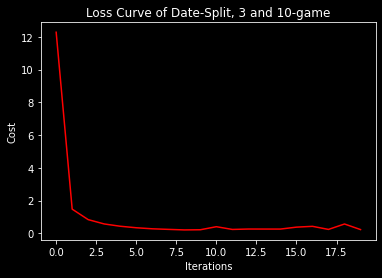

In [121]:
plt.style.use('dark_background')
g10_line, = plt.plot(dateboth_regress.loss_curve_, color='r')
#g3_line, = plt.plot(g3_regress.loss_curve_, color='b')
plt.title("Loss Curve of Date-Split, 3 and 10-game")
plt.xlabel('Iterations')
plt.ylabel('Cost')
#g10_line.set_label("10-Game History")
#g3_line.set_label("3-Game History")
#plt.legend()
plt.show()
